# Scikit-learn Demo: steps for building a ML Model

In scikit-learn we usually follow a fixed set of steps for building a machine learning model:

**1. Import the estimator object (model)**

**2. Create an instance of the estimator**

**3. Use the trainning data to train the estimator**

**4. Evaluate the model**

**5. Make predictions**

Of course these five-step recipe is just a general roadmap that may include several sub-steps, going back and forth between steps, and there are a lot of details that need to be considered in every step. However this is a nice mental model to have. We should add step 0, which is not only very important but perhaps the most time-consuming:

**0. Data preparation**

## 0. Data Preparation

In [1]:
# Importing useful libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# importing useful objects
from crime_dataset_headers import *
# importing data
data_url= 'https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
crime = pd.read_csv(data_url, header=None, names=headers, na_values='?', index_col='communityname')

In [3]:
crime.head()

,state,county,community,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
communityname,,,,,,,,,,,,,,,,,,,,,
Lakewoodcity,8,NaN,NaN,1,0.19,0.33,0.02,0.90,0.12,0.17,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
Tukwilacity,53,NaN,NaN,1,0.00,0.16,0.12,0.74,0.45,0.07,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
Aberdeentown,24,NaN,NaN,1,0.00,0.42,0.49,0.56,0.17,0.04,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
Willingborotownship,34,5.0,81440.0,1,0.04,0.77,1.00,0.08,0.12,0.10,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
Bethlehemtownship,42,95.0,6096.0,1,0.01,0.55,0.02,0.95,0.09,0.05,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [4]:
feature_names = ['householdsize', 'pctUrban', 'medIncome',
                 'racepctblack','racePctWhite', 'racePctAsian', 'racePctHisp']
target_name = 'ViolentCrimesPerPop'

In [5]:
# Getting the features and the target, sklearn can work directly with pandas dataframes
X = crime[feature_names]
y = crime[target_name]

In [6]:
X.head()

,householdsize,pctUrban,medIncome,racepctblack,racePctWhite,racePctAsian,racePctHisp
communityname,,,,,,,
Lakewoodcity,0.33,1.0,0.37,0.02,0.90,0.12,0.17
Tukwilacity,0.16,1.0,0.31,0.12,0.74,0.45,0.07
Aberdeentown,0.42,0.0,0.30,0.49,0.56,0.17,0.04
Willingborotownship,0.77,1.0,0.58,1.00,0.08,0.12,0.10
Bethlehemtownship,0.55,0.9,0.50,0.02,0.95,0.09,0.05


In [7]:
y.head()

communityname
Lakewoodcity           0.20
Tukwilacity            0.67
Aberdeentown           0.43
Willingborotownship    0.12
Bethlehemtownship      0.03
Name: ViolentCrimesPerPop, dtype: float64

### Split the data into: trainning and testing (cross-validation)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### Now the data is ready let the modelling begin!

## 1. Import the estimator object (model)

In [9]:
from sklearn.linear_model import LinearRegression

## 2. Create an instance of the estimator

In [10]:
linear_regression_model = LinearRegression() # Pass any parameters 

## 3. Use the trainning data to train the estimator

In [11]:
linear_regression_model.fit(X_train, y_train)

LinearRegression()

## 4. Evaluate the model

In [12]:
from sklearn.metrics import mean_squared_error
# Get the predictions of the model for the data it has not seen (testing)
y_pred_test = linear_regression_model.predict(X_test)
# All the metrics compare in some way how close are the predicted vs. the actual values
error_metric = mean_squared_error(y_pred=y_pred_test, y_true=y_test)
print('The Mean Square Error of this model is: ', error_metric)

The Mean Square Error of this model is:  0.02451512610564626


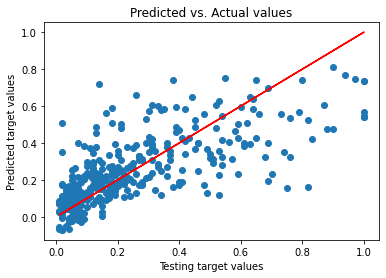

In [13]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_test)
ax.plot(y_test, y_test, color='red')
ax.set_xlabel('Testing target values')
ax.set_ylabel('Predicted target values')
ax.set_title('Predicted vs. Actual values');

## 5. Make predictions

In [14]:
from collections import OrderedDict

In [15]:
new_data = OrderedDict([ 
    ('householdsize', 0.5),
    ('pctUrban', 0.6),
    ('medIncome', 0.1),
    ('racepctblack', 0.1),
    ('racePctWhite', 0.6),
    ('racePctAsian', 0.1),
    ('racePctHisp', 0.2)]
)
# .values.reshape(1, -1) because it must be 2-dim, because we passed only one new observation
new_data = pd.Series(new_data).values.reshape(1,-1) 
# Use the model to make predictions
linear_regression_model.predict(new_data)

array([0.30466662])

For a city with data such as the above, our model predicts a target value of 0.30466662